<a href="https://colab.research.google.com/github/Neyfer29/Big_Data_2021-1/blob/main/Regresi%C3%B3n%20lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal

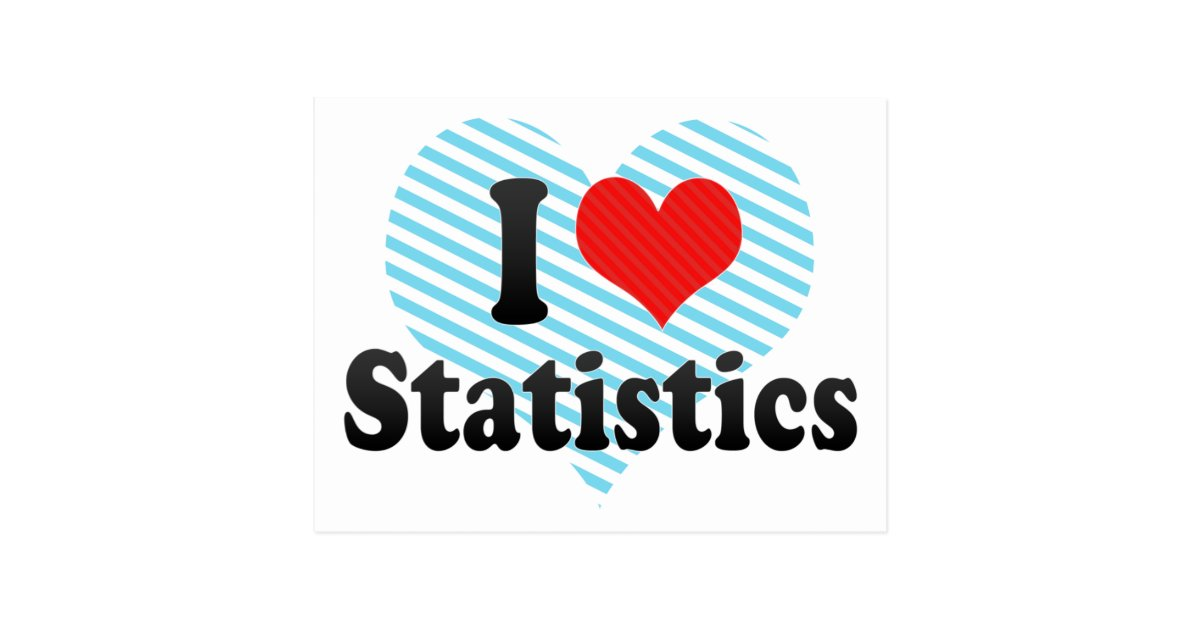

In [139]:
#Import library
from IPython.display import Image# Load image from local storage
Image(filename = "i love stats.jpeg", width = 1200, height = 630)

Imagen tomada de [ir a la página](https://rlv.zcache.com/i_love_statistics_postcard-rdbd6f64b192745f5b2e41d5c7943686d_vgbaq_8byvr_630.jpg?view_padding=%5B285%2C0%2C285%2C0%5D)

## Introducción

La percepción de las relaciones es la piedra angular de la civilización, al comprender cómo ciertos fenómenos dependen de otros, aprendemos a predecir las consecuencias de nuestras acciones y a manipular nuestro entorno. 

La mayoría de las relaciones que conocemos se basan en observaciones empíricas, aunque algunas relaciones se postulan sobre bases teóricas, generalmente las teorías mismas se obtuvieron originalmente a partir de observaciones empíricas, incluso estas relaciones a menudo necesitan ser probadas empíricamente, algunas relaciones son relativamente fáciles de descubrir o verificar, esto es particularmente cierto cuando el azar juega poco o ningún papel en ellos, pero cuando el azar juega un papel, la tarea de descubrir relaciones a menudo requiere un análisis bastante cuidadoso de los datos. 



## Breve historia

El objetivo del notebook es descubrir cómo una o más variables (llamadas variables independientes, predictoras o regresoras) afectan a otras variables (llamadas variables dependientes o variables de respuesta), este análisis recibe el nombre de regresión, una nomenclatura algo desafortunada ya que poco tiene que ver con retroceder, como implica la palabra regresión. 
El nombre regresión proviene de una aplicación temprana (1885) de Sir Francis Galton, que trataba de la relación entre la altura de los padres y la altura de los descendientes, Galton mostró que los padres inusualmente altos tenían hijos que eran más bajos que ellos, y los padres que eran 'más bajos que la mediocridad' tenían hijos más altos que ellos. 

Esto llevó a su teoría de la "regresión hacia la mediocridad" y eventualmente llevó a su uso con otros estudios que involucran relaciones. Esta elección de la palabra es doblemente desafortunada, ya que podría tender a fijar la fecha de la primera aparición de la regresión en la obra la obra de Galton. En realidad, la regresión es mucho más antigua que eso, los matemáticos franceses del siglo XVIII (particularmente Laplace) y otros (particularmente Boscovich, en 1757) claramente estaban haciendo lo que llamaríamos regresión (Stigler, 1975, 1984). (Ver "[Ashish Sen Muni Srivastava Regression Analysis Theory, Methods, and Applications](http://libgen.rs/book/index.php?md5=BC0719EA63C3FACC5295249F02812D4B)").



## Planteamiento del algoritmo

Se tiene un conjunto de datos correspondiente a $n$ individuos, cada individuo cuenta con la información correspondiente a las variables aleatorias $X$ e $Y$.

Se hipotetiza que los datos tienen un patrón lineal subyacente de la forma: $$y=\beta_{0}+\beta_{1}x$$
Como nuestras observaciones no encajan perfectamente en este patrón, podemos reajustar la hipotesis anterior como:
$$y_i=\beta_{0}+\beta_{1}x_i+\epsilon_i$$ Donde $i=1,2,...,n$ y n es el número de datos.

En general, modelos de la forma:
$$y_i=\beta_0+\beta_{1}x_{i1}++\beta_{2}x_{i2}+...++\beta_{k}x_{ik}+\epsilon_i$$
Con $k>1$ variables independientes, son llamados modelos de regresión multiple. donde los $\beta_{j}$'s son llamados parámetros y los $\epsilon_i$ errores ambos deconocidos.

Cuando $x=0$, $y=\beta_{0}$. El término $\beta_{0}$ es llamado el intercepto.
 
Para cada unidad de incremento en $x$, $y$ incrementa por $\beta_{1}$, el cual es llamado pendiente.

$\epsilon_i$ son variables aleatorias.

Los $y_i$'s son llamados observaciones, $x_{i1},...,x_{ik}$ y constituyen los puntos de diseño asociados a $y_i$. Luego $y_i,x_{i1},...,x_{ik}$ constituyen un caso o un dato.

### Mínimos cuadrados ordinarios

Los residuales mas pequeños corresponden a modelos que ajustan mejor la recta o hiperplano a la nube de puntos. Los $\beta_j$'s, son estimados haciendo:
$$S=\sum_{i=1}^{n}\epsilon_i=\sum_{i=1}^{n}(y_i-\beta{0}-\beta{1}x{i1}-\beta{2}x{i2}-...-\beta{k}x{ik})^2$$
En el caso de la regresión lineal simple se convierte en: 
$$S=\sum_{i=1}^{n}\epsilon_i=\sum_{i=1}^{n}(y_i-\beta{0}-\beta{1}x{i1})^2$$

$$\frac{\partial S}{\partial \beta_0}=-2\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_{i1})$$

$$\frac{\partial S}{\partial \beta_1}=-2\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_{i1})x_{i1}$$

Igualando a 0 ambas ecuaciones y resolviendo se tiene que:
$$\beta_0=\bar{y}-b_1\bar{x}$$
$$\beta_0=(\sum_{i=1}^{n}(y_ix_{i1}-n\bar{x_1}\bar{y}))/(\sum_{i=1}^{n}(x_{i1}^{2}-n\bar{x_1}^2))$$

## Ejemplo practico

Haremos uso del paquete [Scikit-Learn](https://sklearn.org/) de Python que proporciona implementaciones solidas de gran variedad de algoritmos de aprendizaje de máquina.

In [11]:
# carga de paquetes
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

In [3]:
import sklearn

In [50]:
# carga de función de regresión lineal
from sklearn.linear_model import LinearRegression

In [60]:
# Se le indica al mdelo que se debe hacer estimación de un intercepto
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Se importa la base de datos [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) haciendo uso del paquete seaborn. La base de datos consta de 150 observaciones realizadas a flores de tres especies diferentes (Setosa, Versicolor y virginica). Las columnas representan la longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo y especie.

In [64]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Se grafican diagramas de dispersión por pares de variables.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


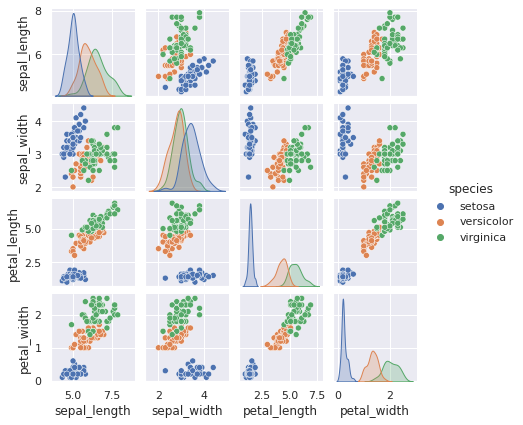

In [65]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

Para explorar el método de regresión lineal simple solo se tendrán en cuenta las variables sepal length y petal width ya que parecen presentar una asociación lineal.

In [129]:
model_1 = LinearRegression(fit_intercept=True)
model_1.fit(X_iris.loc[:,['petal_width']], X_iris.loc[:,['sepal_length']])

LinearRegression()

El modelo de regresióón lineal ajustado es:
$$sepal\_ length=4.77+0.88petal\_ width + \epsilon$$

In [135]:
print("B1_pendiente:",model_1.coef_,"B0_intercepto:",model_1.intercept_)
print("sepal_length=",model_1.intercept_,"+",model_1.coef_,"petal_width")

B1_pendiente: [[0.88858025]] B0_intercepto: [4.77762942]
sepal_length= [4.77762942] + [[0.88858025]] petal_width


Graficando diagrama de dispersión y recta de regresión ajustada para las variables sepal length y petal width.

In [136]:
xfit_1 = np.linspace(0, 3)
Xfit_1 = xfit_1[:, np.newaxis]
yfit_1 = model_1.predict(Xfit_1)

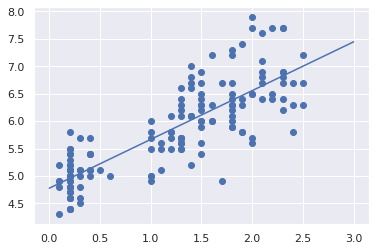

In [138]:
plt.scatter(X_iris.loc[:,['petal_width']], X_iris.loc[:,['sepal_length']])
plt.plot(xfit_1, yfit_1);

## Conclusiones

Existe una asociacióón lineal positiva entre el ancho del sépalo y la longitud del sépalo, se espera que en promedio un aumento de un centímetro en el ancho del sépalo genera un aumento de 0.88 centímetros en la longitud del sépalo entre las especies de flores observadas.